# EDA Student Performance Indicator

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

### Data Checks to Perform
- **Check Missing Values**
- **Check Duplicates**
- **Check Data types**
- **Check the number of unique values of each columns**
- **Check Statistics of Dataset**
- **Check various Categories present in the different categorical column**

In [5]:
# Check Missing Values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### Insights or Observations 
- **Therefore there are no Missing Values**

In [8]:
# Check Duplicates
df.duplicated().sum()

0

### Insights or Observations 
- **Therefore there are no Duplicated Values**

In [11]:
# Check Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [13]:
# Check the number of unique values of each columns
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [14]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [15]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [17]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [18]:
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [20]:
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [21]:
# Check Statistics of Dataset
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insights or Observations 
- **Means are very close to each other betn 66 and 69**
- **Standard Deviation are close-between 14.6-15.19**

In [22]:
## Segregate Numerical and Categorical Features
numerical_features={feature for feature in df.columns if df[feature].dtype!='0'}
categorical_features={feature for feature in df.columns if df[feature].dtype=='0'}

In [23]:
numerical_features

{'gender',
 'lunch',
 'math score',
 'parental level of education',
 'race/ethnicity',
 'reading score',
 'test preparation course',
 'writing score'}

In [24]:
categorical_features

set()

In [25]:
## Aggregate the total score of the mean
df['total_score']=(df['math score']+df['reading score']+df['writing score'])
df['average']=df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<Axes: xlabel='average', ylabel='Count'>

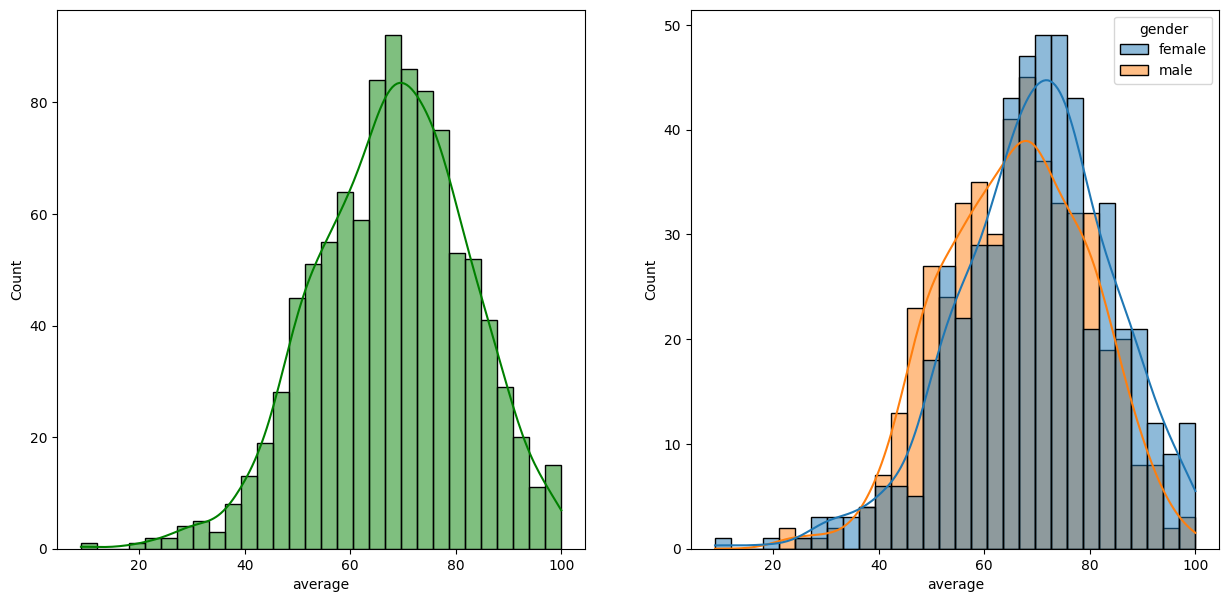

In [27]:
## Explore Visualization
fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='gender')

### Insights
- Female Students tend to perform well than male Students

<Axes: xlabel='average', ylabel='Count'>

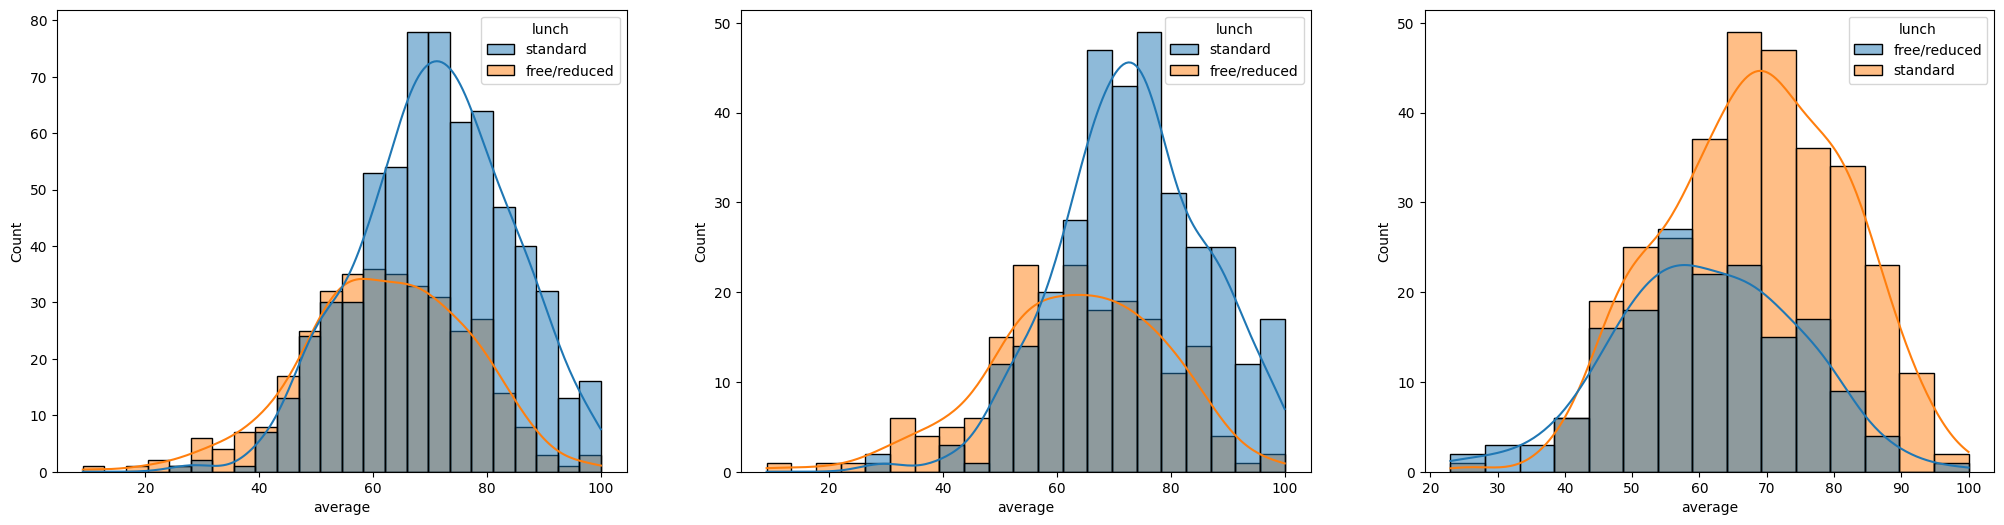

In [28]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')

## Insights
- Standard Lunch helps Students perform well in Exams
- Standard Lunch helps perform well in Examsbe it a male or female

<Axes: xlabel='average', ylabel='Count'>

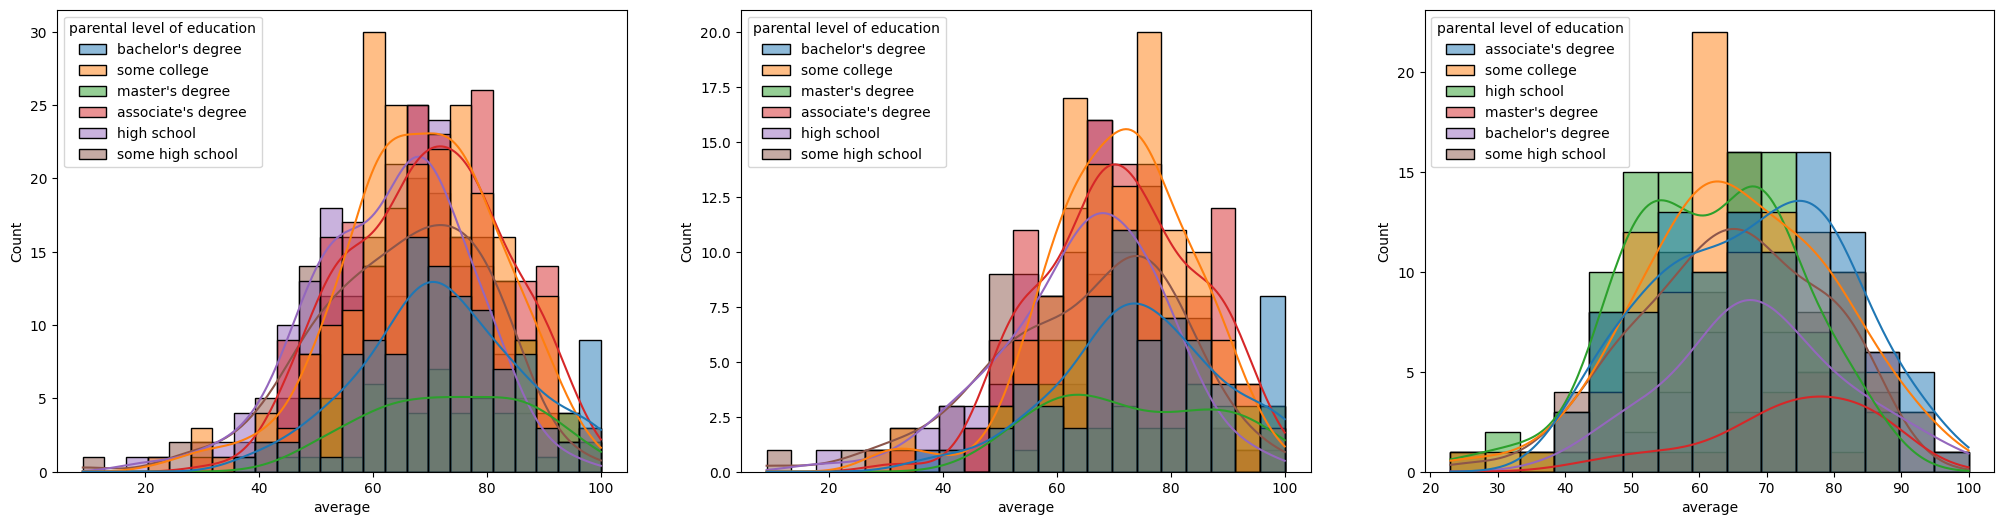

In [30]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')

## Insights
- In general Parents education dont help student Perform well in Exam
- 2nd Plot we can see there is no effect of Parents Education on Female Students
- 3rd Plot shows that Parents Whose Education is of Associate degree or Master degree their Male Child tend to Perform well in Exam

<Axes: xlabel='average', ylabel='Count'>

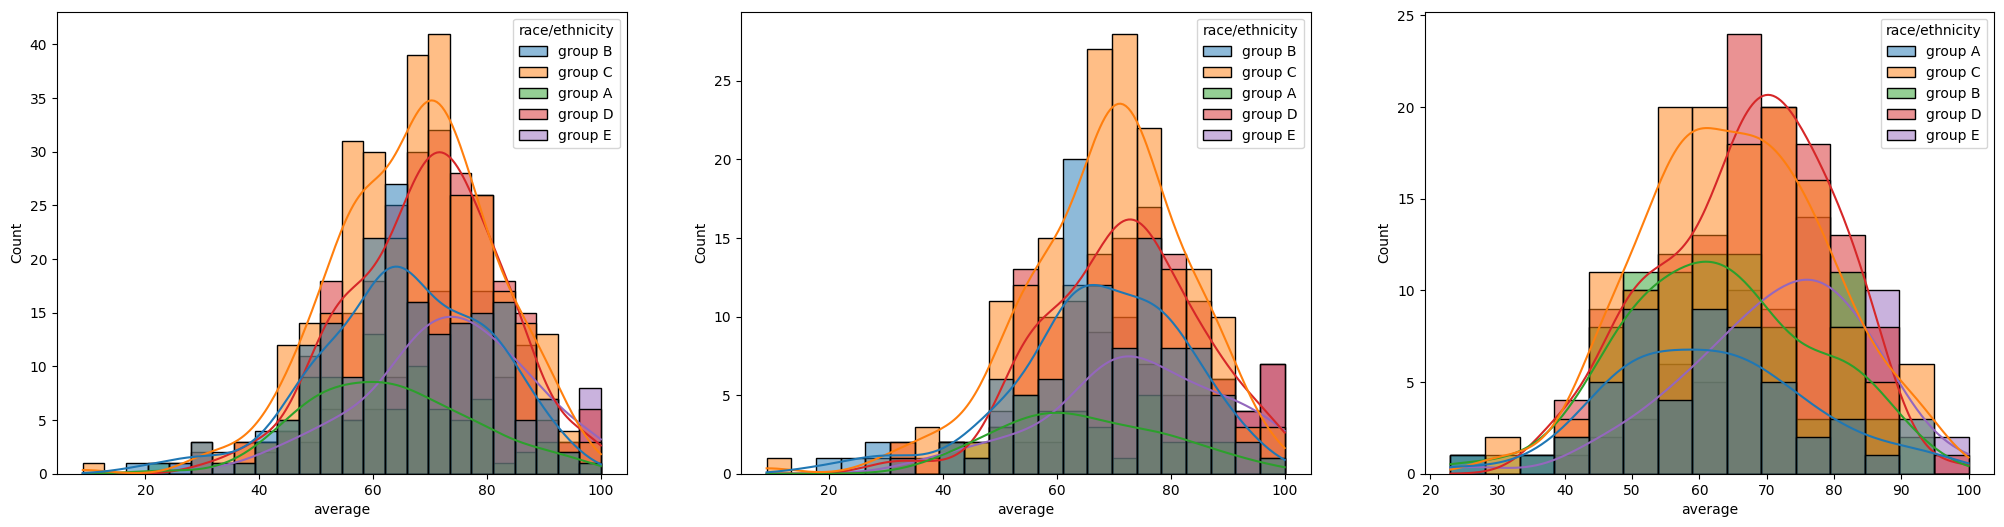

In [31]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')

## Insights
- Students of group A and B tends to perform poorly in Exam
- Students of group A and B tends to perform poorly in Exam irrespective of whether they are male or female

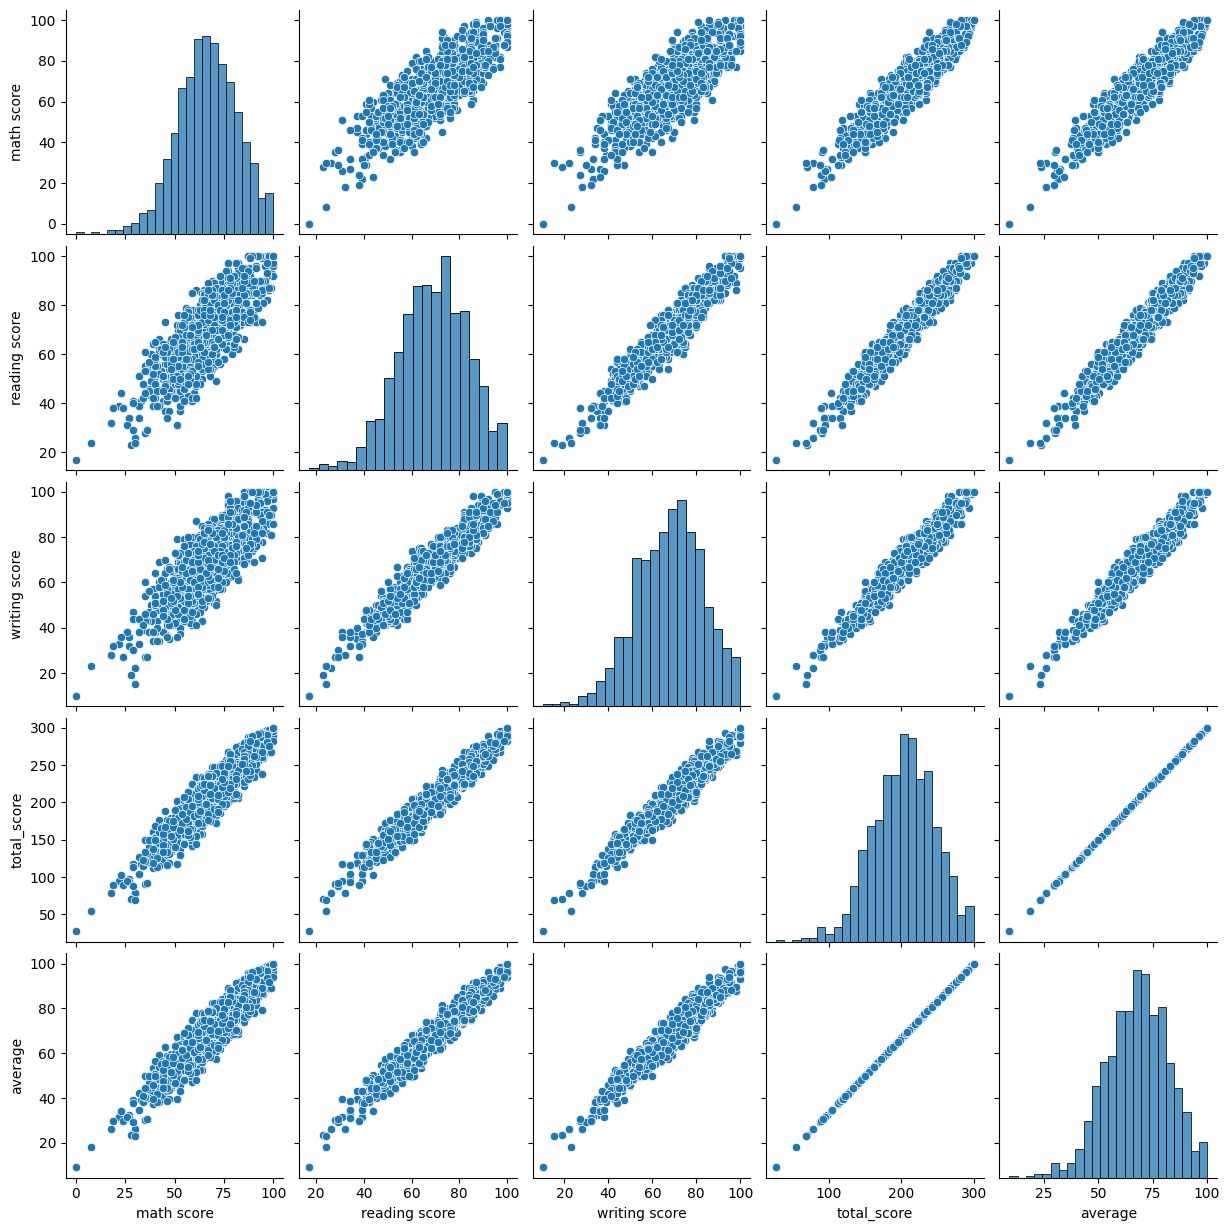

In [32]:
sns.pairplot(df)

<Axes: >

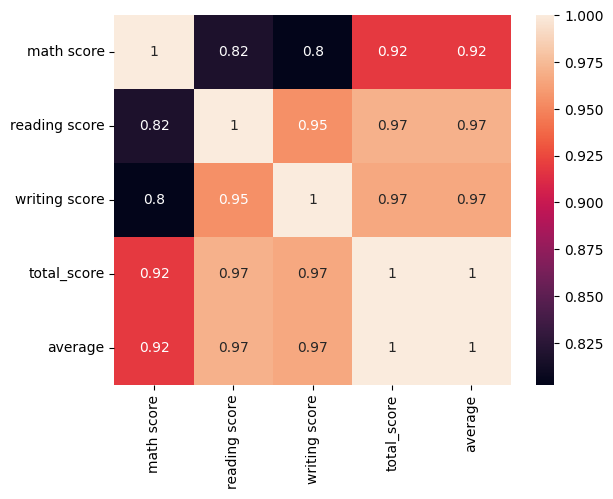

In [36]:
numeric_df=df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(),annot=True)

## Insights
- Strongly Positively Correlated